# Principal Component Analysis

**Principal Component Analysis** aims to project data into a lower dimension, while preserving as much as information as possible.

**How do we do this?** By finding an orthogonal basis (a new coordinate system) of the data, then pruning the "less important" dimensions such that the remaining dimensions minimize the squared error in reconstructing the original data.

<div>
<img src='https://www.researchgate.net/publication/344399773/figure/fig2/AS:941024662790149@1601369171686/An-example-of-principal-component-analysis-PCA-for-a-two-dimensional-data-set.png' width="500"/>
</div>
<!-- 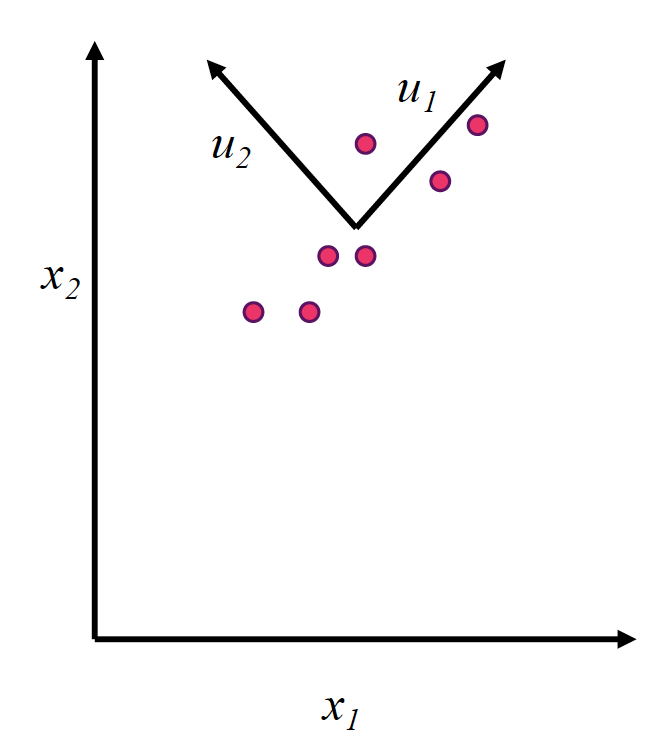 -->

Finding the vectors is quite easy visually as seen above, but how do we do this mathematically? We find the orthogonal vectors $\mathbf{u}_1 \dots \mathbf{u}_M$ such that it minimizes the sum of the errors of $||\mathbf{x}^{(n)}-\hat{\mathbf{x}}^{(n)}||^2$, where $\mathbf{x}^{(n)}$ is the given data point and $\hat{\mathbf{x}}^{(n)}$ is the reconstructed vector (obtained by projecting $\mathbf{x}^{(n)}$ to the lower dimension, then projecting back to the original dimension).


**The PCA Algorithm**

Given $M < d$

Given zero-mean data matrix $X \in \mathbb{R}^{d \times N}$, where $\mathbf{x}^{(i)}$ refers to the $i$th column of $X$

Find set of $M$ vectors $\lbrack \mathbf{u}_1, \dots , \mathbf{u}_M \rbrack$

that minimizes $E_M= \frac{1}{N} \sum_{n=1}^N \| \mathbf{x}^{(n)} - \hat{\mathbf{x}}^{(n)} \|^2$

where $\hat{\mathbf{x}}^{(n)} = \sum_{i=1}^M z_i^{(n)} \mathbf{u}_i$

where $z_i^{(n)} = (\mathbf{u}_i)^T \mathbf{x}^{(i)}$

and $\| \mathbf{u}_i \| = 1$ for all $i$

If we have M new vectors, and d original vectors, where $M < d$, it is usually not possible to reconstruct the original data without losing any error. In other words, if $M = d$, we can reconstruct the original data with 0 error. So, we know that all the error comes from the (M-d) missing components (vectors). This error can be expressed in terms of the covariance matrix of the original data, and the error is minimized when the principal component vectors $u_1 \dots u_M$ are the top $M$ eigenvectors of the covariance matrix (in terms of eigenvalues). The higher the eigenvalues for these eigenvectors are, the more information they store and the lower reconstruction error becomes.

In [1]:
import numpy as np

We perform PCA on the following dataset, where each row represents a data point:

In [2]:
# Normal-distributed data
data = np.array([
    [-0.21, -0.61, -0.35,  0.08],
    [ 0.15, -0.77,  1.26,  1.57],
    [ 0.03,  0.12, -0.39, -0.25],
    [ 0.92,  1.31,  0.31,  1.19],
    [ 2.51,  1.99,  1.86,  2.57],
    [ 0.91,  1.23, -0.01,  0.04]
])

We obtain the following principal components, which correspond to the following eigenvalues:

In [3]:
# compute covariance matrix for SVD
M = np.cov(data, rowvar=False)
# compute eigenvalues and eigenvectors by SVD
eigenvalues, eigenvectors = np.linalg.eigh(M) 

# Sort eigenvalues/eigenvectors
sort_idx = np.argsort(eigenvalues)[::-1]
eigenvectors = eigenvectors[:, sort_idx]
eigenvalues = eigenvalues[sort_idx]
print('Eigenvalues:')
print(eigenvalues)
print()
print('Eigenvectors (each column is an eigenvector):')
print(eigenvectors)
print()

# Sanity check that eigenvectors are orthogonal
assert np.allclose(eigenvectors @ eigenvectors.T, np.eye(len(eigenvectors)))

# Calculate explained variance for top k principal components
variance_proportions = eigenvalues / np.sum(eigenvalues)
explained_variance = np.cumsum(variance_proportions)
print('Cumulative fraction of explained variance', explained_variance)

Eigenvalues:
[3.26461813 0.9993007  0.04305869 0.01364248]

Eigenvectors (each column is an eigenvector):
[[-0.5311548   0.22890487  0.47886055 -0.66043146]
 [-0.48783155  0.70352547 -0.26794389  0.4419031 ]
 [-0.43459558 -0.45986533  0.5240479   0.57010908]
 [-0.53946422 -0.49109912 -0.65136199 -0.2086326 ]]

Cumulative fraction of explained variance [0.7555902  0.98687661 0.99684247 1.        ]


1. Why are there only 4 principal components? 

In [ ]:
'''
Our original space is 4D / the span of 4 vectors, so our new coordinate space can be at most dimension 4 as well.
'''

2. How much of the variance in the data is preserved by the first two principal components? 

In [ ]:
explained_variance[1]

0.9868766124560575

3. How much of the variance in the data is preserved by the first and third principal components?

In [ ]:
variance_proportions[0] + variance_proportions[2]

0.7655560605362814

In [ ]:
def compute_pca(pc_indices):
    '''
    Parameters:
        pc_indices: which principal components to project data onto 
        (i.e. [0] projects only onto top principal component, [0, 1] projects onto top 2)

    Returns:
        reconstruction_error: Reconstruction error after projecting onto 
                              principal components
        reduced_representation: Lower-dimensional representation obtained by 
                                projecting onto principal components
        reconstruction: Reconstruction of reduced representation in 
                        original dimension
        error_per_row: Reconstruction error per row/example of the data matrix
    '''
    pcs = eigenvectors[:, pc_indices]
    reduced_representation = data @ pcs # 2 dimensional
    reconstruction = reduced_representation @ pcs.T # 4 dimensional
    reconstruction_error = np.sum((data - reconstruction)**2)
    error_per_row = np.sum((data - reconstruction)**2, axis=-1)
    return reconstruction_error, reduced_representation, reconstruction, error_per_row

# Sanity check using all 4 principal components
print("Reconstruction error using all components (should be near 0):", compute_pca([0, 1, 2, 3])[0])

Reconstruction error using all components (should be near 0): 1.1629029819577483e-29


4. Perform a dimensionality reduction such that we project the points onto the first and second principal components. Then, inverse transform it back to four dimensions. What is the reconstruction error of this new dataset?

In [ ]:
# Using top 2 principal components
error01, z01, rec01, error_per_row01 = compute_pca([0, 1])

print('Reconstruction error using top 2 principal components:          ', error01)

Reconstruction error using top 2 principal components:           0.5419217439736854


5. Perform a dimensionality reduction such that we project the points onto the first and third principal components. Then, inverse transform it back to four dimensions. What is the reconstruction error of this new dataset?

In [ ]:
# Using first and third principal components
error02, z02, rec02, error_per_row02 = compute_pca([0, 2])

print('Reconstruction error using first and third principal components:', error02)

Reconstruction error using first and third principal components: 5.2593228988336485


6. Consider the reconstruction error of the fourth row in particular. Is it lower using the first and second principal components or using the first and third? Why might this be the case?

In [ ]:
print('Reconstruction error per row using top 2 principal components:\n', np.round(error_per_row01, 3))
print('Reconstruction error per row using first and third principal components:\n', np.round(error_per_row02, 3))

Reconstruction error per row using top 2 principal components:
 [0.15  0.009 0.022 0.284 0.065 0.011]
Reconstruction error per row using first and third principal components:
 [0.247 3.454 0.174 0.174 0.085 1.126]


In [ ]:
'''

'''